<a href="https://colab.research.google.com/github/LoPA607/tensorflow_power/blob/main/Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow
from tensorflow import keras
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
import pydot
from IPython.display import SVG
from keras.utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
import numpy
import math

In [11]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [12]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [14]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [26]:
def model(input_shape):
  X_input=Input(input_shape)
  X=ZeroPadding2D((3,3))(X_input)
  X=Conv2D(32,(7,7),strides=(1,1), name='conv0')(X)
  X=BatchNormalization(axis=3,name='bn0')(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((2,2),name='max_pool')(X)
  X=Flatten()(X)
  X=Dense(1,activation='sigmoid',name='fc')(X)
  model=Model(inputs=X_input, outputs=X, name='HappyModel')
  return model



In [27]:
HappyModel=model((64, 64, 3))

In [28]:
HappyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
HappyModel.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
19/19 [==============================] - 5s 175ms/step - loss: 2.0562 - accuracy: 0.5950
Epoch 2/30
19/19 [==============================] - 3s 167ms/step - loss: 0.4130 - accuracy: 0.8167
Epoch 3/30
19/19 [==============================] - 4s 235ms/step - loss: 0.2275 - accuracy: 0.9100
Epoch 4/30
19/19 [==============================] - 3s 164ms/step - loss: 0.1490 - accuracy: 0.9450
Epoch 5/30
19/19 [==============================] - 3s 170ms/step - loss: 0.1375 - accuracy: 0.9533
Epoch 6/30
19/19 [==============================] - 3s 163ms/step - loss: 0.1008 - accuracy: 0.9633
Epoch 7/30
19/19 [==============================] - 5s 240ms/step - loss: 0.1006 - accuracy: 0.9650
Epoch 8/30
19/19 [==============================] - 3s 169ms/step - loss: 0.0804 - accuracy: 0.9800
Epoch 9/30
19/19 [==============================] - 3s 165ms/step - loss: 0.0795 - accuracy: 0.9733
Epoch 10/30
19/19 [==============================] - 4s 194ms/step - loss: 0.0820 - accuracy: 0.9783

In [30]:
preds = HappyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print("loss="+str(preds[0]))
print("Test Accuracy="+str(preds[1]))

5/5 [==============================] - 0s 43ms/step - loss: 0.0866 - accuracy: 0.9733
loss=0.08656512200832367
Test Accuracy=0.9733333587646484


In [32]:
from keras.applications.imagenet_utils import preprocess_input

1/1 [==============================] - 0s 86ms/step
[[1.]]


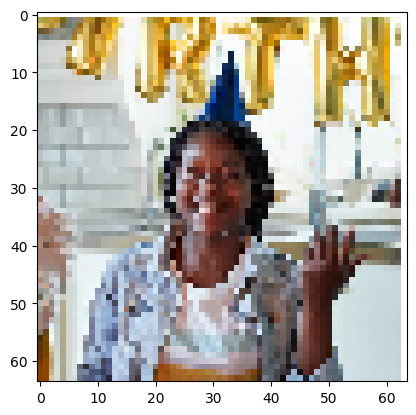

In [33]:
img_path='happy.jpg'
img=image.load_img(img_path, target_size=(64,64))
imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)
print(HappyModel.predict(x))

1/1 [==============================] - 0s 27ms/step
[[0.]]


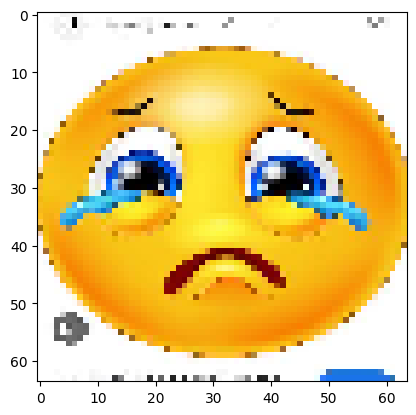

In [34]:
img_path='sad.jpg'
img=image.load_img(img_path, target_size=(64,64))
imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)
print(HappyModel.predict(x))